# Final Capstone - Wish E- Commerce Analytics 
#### By Christian Rios-Chambi

## This data comes from the Wish e-commerce platform.

Dataset Description:

*The products listed in the dataset are those that would appear if you type "summer" in the search field of the platform. There are no specific categories on the website, only tags.*

*The data was scraped in the french localisation (from france) (hence some non-ascii latin characters such as « é » and « à ») in the title column.*

*The title_orig on the other hand contains the original title (the base title) that is displayed by default. When a translation is provided by the seller, it appears in the title column. When the title and title_orig columns are the same, it generally means that the seller did not specify a translation that would be displayed to users with french settings.*

*Studying top products requires more than just product listings. You also need to know what sells well and what does not.
This dataset contains product listings as well as products ratings and sales performance, which you would not find in other datasets.*

In [1]:
#libraries and settings used for this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import pandas_profiling
import warnings
import collections
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

plt.style.use('fivethirtyeight') #plot style
sns.set_style("whitegrid")

warnings.filterwarnings("ignore")

In [2]:
#import data files
wish = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')
cat = pd.read_csv('unique-categories.csv')
sort_cat = pd.read_csv('unique-categories.sorted-by-count.csv')

# Exploratory Data Analysis

In [3]:
#how many records are we dealing with?
wish.shape

(1573, 43)

In [4]:
cat.shape

(2620, 1)

In [5]:
sort_cat.shape

(2620, 2)

In [6]:
wish.head(5)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [7]:
wish.tail(5)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.0,9,EUR,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",navyblue,S,50,Livraison standard,2,0,41,50,NaN,NaN,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summer Shorts Lace Up Elastic W...,2.0,56,EUR,100,1,3.07,28,11.0,3.0,1.0,3.0,10.0,0,0,0,0,"Summer,Panties,Elastic,Lace,Casual pants,casua...",lightblue,S,2,Livraison standard,1,0,26,50,1.0,Quantité limitée !,CN,sell best quality goods,sellbestqualitygoods,"(4,435 notes)",4435,3.696054,54d83b6b6b8a771e478558de,0,NaN,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4,summer,2020-08
1570,Nouveautés Hommes Siwmwear Beach-Shorts Hommes...,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.0,19,EUR,100,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",white,SIZE S,15,Livraison standard,2,0,11,50,NaN,NaN,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,NaN,https://www.wish.com/c/5e74be96034d613d42b52dfe,https://contestimg.wish.com/api/webimage/5e74b...,5e74be96034d613d42b52dfe,summer,2020-08
1571,Mode femmes d'été sans manches robes col en V ...,Fashion Women Summer Sleeveless Dresses V Neck...,13.0,11,EUR,100,0,2.50,2,0.0,1.0,0.0,0.0,1.0,0,0,0,0,"Summer,fashion women,Fashion,Lace,Dresses,Dres...",white,Size S.,36,Livraison standard,3,0,29,50,NaN,NaN,CN,modai,modai,77 % avis positifs (31 notes),31,3.774194,5d56b32c40defd78043d5af9,0,NaN,https://www.wish.com/c/5eda07ab0e295c2097c36590,https://contestimg.wish.com/api/webimage/5eda0...,5eda07ab0e295c2097c36590,summer,2020-08
1572,Pantalon de yoga pour femmes à la mode Slim Fi...,Fashion Women Yoga Pants Slim Fit Fitness Runn...,7.0,6,EUR,100,1,4.07,14,8.0,3.0,1.0,0.0,2.0,0,0,0,0,"Summer,Leggings,slim,Yoga,pants,Slim Fit,Women...",red,S,50,Livraison standard,2,0,41,50,NaN,NaN,CN,AISHOPPINGMALL,aishoppingmall,"90 % avis positifs (7,023 notes)",7023,4.235939,5a409cf87b584e7951b2e25f,0,NaN,https://www.wish.com/c/5e857321f53c3d2d8f25e7ed,https://contestimg.wish.com/api/webimage/5e857...,5e857321f53c3d2d8f25e7ed,summer,2020-08


In [8]:
wish.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [9]:
wish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [10]:
wish.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,95.735602,0.105531,0.018436,0.074380,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345,0.143675
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,214.075544,0.340709,0.134565,0.262472,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768,0.350871
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333,0.000000
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,20.000000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,94.000000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797,0.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,2789.000000,3.000000,1.000000,1.000000,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000,1.000000


In [11]:
# lets check if there are any nulls in these columns. Sorted descending style.
wish.isnull().sum().sort_values(ascending=False)

merchant_profile_picture        1347
has_urgency_banner              1100
urgency_text                    1100
rating_one_count                  45
rating_two_count                  45
rating_three_count                45
rating_four_count                 45
rating_five_count                 45
product_color                     41
origin_country                    17
product_variation_size_id         14
merchant_name                      4
merchant_info_subtitle             1
crawl_month                        0
badges_count                       0
rating_count                       0
badge_product_quality              0
rating                             0
uses_ad_boosts                     0
units_sold                         0
currency_buyer                     0
retail_price                       0
price                              0
title_orig                         0
badge_local_product                0
product_variation_inventory        0
badge_fast_shipping                0
m

*I have null values in my merchant_profile_picture (1347), has_urgency_banner (1100), urgency_text (1100), rating_one_count (45), rating_two_count (45), rating_three_count (45), rating_four_count (45), rating_five_count (45), product_color (41), origin_country (17), product_variation_size_id (14), merchant_name (4) and merchant_info_subtitle (1) columns.*


## The wish dataframe is the main dataset. There are 1573 different products and 43 unique columns. 

#### Here is a summary breakdown for each column:

**'title'** = Title for localized for european countries. May be the same as title_orig if the seller did not offer a translation. {object}

**'title_orig'** = Original english title of the product. {object}

**'price'** = price you would pay to buy the product. {float64}

**'retail_price'** = reference price for similar articles on the market, or in other stores/places. Used by the seller to indicate a regular value or. {float64}

*'currency_buyer' = currency of the prices. 1 unique value. {object} {delete}*

**'units_sold'** = Number of units sold. Lower bound approximation by steps. On the Wish website, the units solds is shown as a string '20,000 +'. {int64}

**'uses_ad_boosts'** = Whether the seller paid to boost his product within the platform (highlighting, better placement or whatever).A boolen column with '1' meaning seller used Wish's paid 'Product Boost' service and '0' meaning that they did. Product Boost is the native advertising platform of the Wish Marketplace. Wish statement : " You can run targeted campaigns on your products from Wish, to maximize your conversions and generate higher revenue. As Wish understands its buyers, its native ad system suggests items to customers based on their previous purchases, so the conversion rate is always higher." {int64}

**'rating'** = Mean product rating. {float64}

**'rating_count'** = Total number of ratings of the product. {int64}

**'rating_five_count'** = The total amount of five star ratings the product recived. {float64}

**'rating_four_count'** = The total amount of four four ratings the product recived. {float64}

**'rating_three_count'** = The total amount of three star ratings the product recived. {float64}

**'rating_two_count'** = The total amount of two star ratings the product recived. {float64}

**'rating_one_count'** = The total amount of two star ratings the product recived. {float64}

**'badges_count'** = Number of badges the product or the seller have. {int64}

**'badge_local_product'** = A badge that denotes the product is a local product. Conditions may vary (being produced locally, or something else). 

**'badge_product_quality'** = Badge awarded when many buyers consistently gave good evaluations 1 means Yes, has the badge.

**'badge_fast_shipping'** = Badge awarded when this product's order is consistently shipped rapidly

**'tags'**= tags set by the seller. 

**'product_color'** = Product's main color.

**'product_variation_size_id'** = One of the available size variation for this product.

*'product_variation_inventory' = Inventory the seller has. Max allowed quantity is 50.*

*'shipping_option_name' = french shipping quality option*

*'shipping_option_price' = shipping price*

*'shipping_is_express' = whether the shipping is express or not. 1 for True*

**'countries_shipped_to'** = Number of countries this product is shipped to. Sellers may choose to limit where they ship a product to

*'inventory_total' = Total inventory for all the product's variations (size/color variations for instance)*

**'has_urgency_banner'** = whether there was an urgency banner with an urgency

**'urgency_text'** = A text banner that appear over some products in the search results.

**'origin_country'** = country where the products are coming from

**'merchant_title'** = Merchant's displayed name (show in the UI as the seller's shop name)

*'merchant_name' = Merchant's canonical name. A name not shown publicly. Used by the website under the hood as a canonical name.*

**'merchant_info_subtitle'** = The subtitle text as shown on a seller's info section to the user. (raw, not preprocessed). The website shows this to the user.

**'merchant_rating_count'** = Number of ratings of this seller

**'merchant_rating'** = merchant's rating

*'merchant_id' = merchant unique id*

**'merchant_has_profile_picture'** = Convenience boolean that says whether there is a `merchant_profile_picture` url.

*'product_url' = url to the product page. You may need to login to access it*

**'product_picture'** = actual picture of the product

**'product_id'** = product identifier. You can use this key to remove duplicate entries if you're not interested in studying them.

*'theme' = the search term used in the search bar of the website to get these search results.*

*'crawl_month' = meta: for info only.*

## Here is a code to create a quick statistical summery of each dataset. The html page summary reports are included in repo.

In [12]:
# report = pandas_profiling.ProfileReport(wish)
# report.to_file("wish_report.html")
# report_cat = pandas_profiling.ProfileReport(cat)
# report_cat.to_file("cat_report.html")

# Title and Title_Orig 
### Title for localized for european countries. May be the same as title_orig if the seller did not offer a translation. {object}

In [106]:
wish['title'].head(5)

0    2020 Summer Vintage Flamingo Print  Pajamas Se...
1    SSHOUSE Summer Casual Sleeveless Soirée Party ...
2    2020 Nouvelle Arrivée Femmes Printemps et Été ...
3    Hot Summer Cool T-shirt pour les femmes Mode T...
4    Femmes Shorts d'été à lacets taille élastique ...
Name: title, dtype: object

In [107]:
wish['title_orig'].head(5)

0    2020 Summer Vintage Flamingo Print  Pajamas Se...
1     Women's Casual Summer Sleeveless Sexy Mini Dress
2    2020 New Arrival Women Spring and Summer Beach...
3    Hot Summer Cool T Shirt for Women Fashion Tops...
4    Women Summer Shorts Lace Up Elastic Waistband ...
Name: title_orig, dtype: object

# Price 
### Price you would pay to buy the product. {float64}

*The price column doesn't have any nulls to drop. It also seems to be labeled correctly. Advance to visualization.*

In [13]:
wish['price'].describe()

count    1573.000000
mean        8.325372
std         3.932030
min         1.000000
25%         5.810000
50%         8.000000
75%        11.000000
max        49.000000
Name: price, dtype: float64

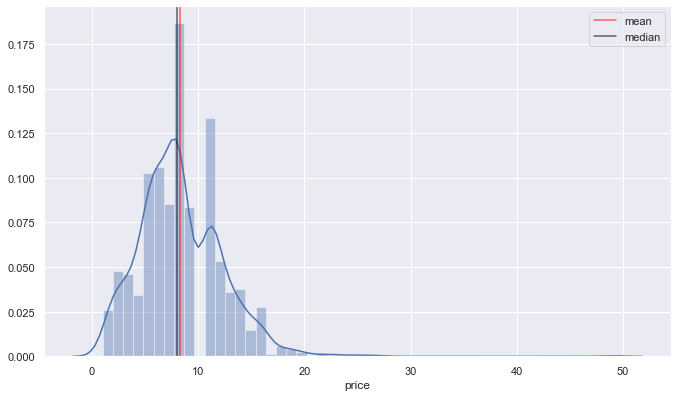

In [14]:
# Visualization of price
sns.set(rc={'figure.figsize': (10, 6)})

mean=wish['price'].mean()
median=wish['price'].median()

sns.distplot(wish.price,bins=50)
plt.axvline(mean,0, 1, color = 'red', label='mean', alpha = 0.6)
plt.axvline(median,0, 1, color = 'black', label='median', alpha = 0.6)

plt.legend()

8.0
8.325371900826434


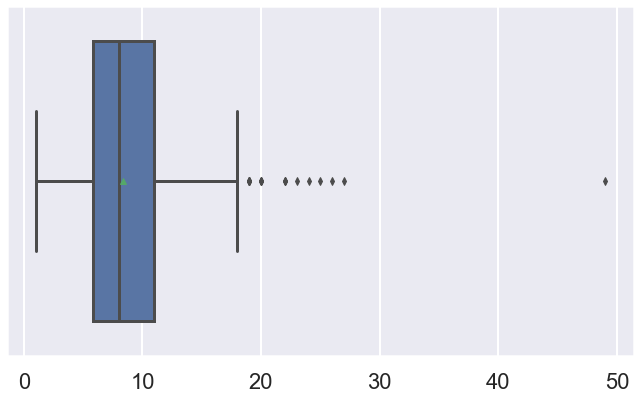

In [15]:
sns.set_context('poster')

x = wish['price'].values

# 3. add boxplot 
sns.boxplot(x, showmeans = True)

# The line in the middle signifies the median
# Check your median value with python 
print(wish['price'].median())
# Check your median value with python
print(wish['price'].mean())

[Text(0.5, 0, '')]

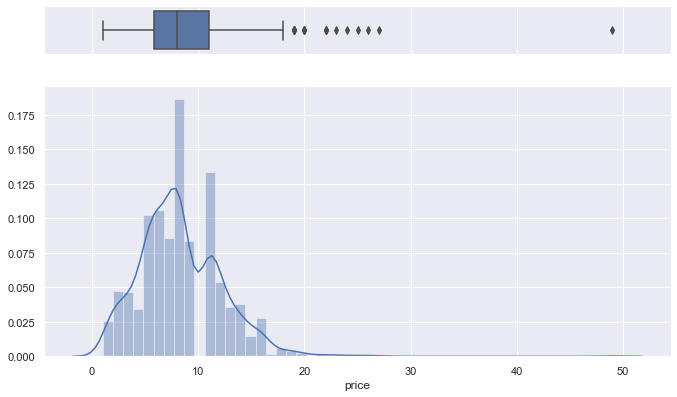

In [16]:
# Cut the window in 2 parts
sns.set(rc={'figure.figsize': (10, 6)})

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(wish["price"], ax=ax_box)
sns.distplot(wish["price"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

The median value of the prices is 8 euros and the mean is 8.33 euros. The price data seems to be normally distributed. There are a couple of outliers. The outliers seem to be located between 19 to 50 euros. 

# Retail Price 
### Reference price for similar articles on the market, or in other stores/places. Used by the seller to indicate a regular value or. {float64}

*The price column doesn't have any nulls to drop. It also seems to be labeled correctly. Advance to visualization.*

In [17]:
wish['retail_price'].describe()

count    1573.000000
mean       23.288620
std        30.357863
min         1.000000
25%         7.000000
50%        10.000000
75%        26.000000
max       252.000000
Name: retail_price, dtype: float64

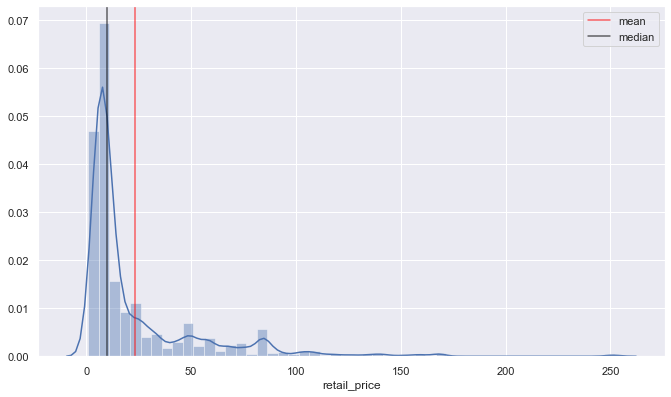

In [18]:
sns.set(rc={'figure.figsize': (10, 6)})

mean=wish['retail_price'].mean()
median=wish['retail_price'].median()

sns.distplot(wish.retail_price,bins=50)
plt.axvline(mean,0, 1, color = 'red', label='mean', alpha=0.6)
plt.axvline(median,0, 1, color = 'black', label='median', alpha=0.6)

plt.legend()

10.0
23.28862047043865


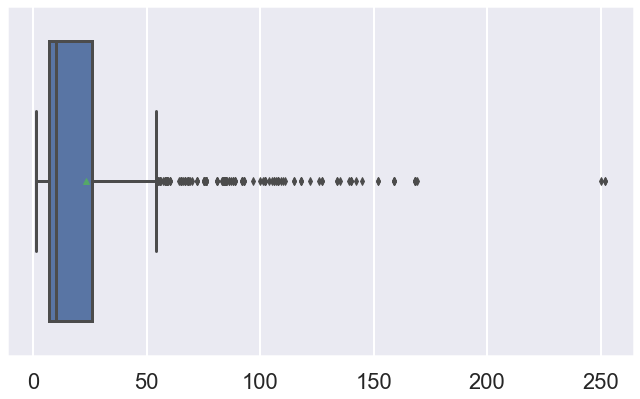

In [19]:
sns.set_context('poster')

x = wish['retail_price'].values

# 3. add boxplot 
sns.boxplot(x, showmeans = True)

# The line in the middle signifies the median
# Check your median value with python 
print(wish['retail_price'].median())
# Check your median value with python
print(wish['retail_price'].mean())

[Text(0.5, 0, '')]

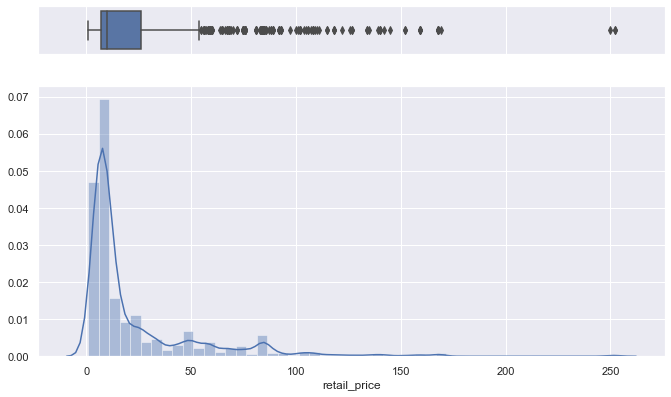

In [20]:
# Cut the window in 2 parts
sns.set(rc={'figure.figsize': (10, 6)})

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(wish["retail_price"], ax=ax_box)
sns.distplot(wish["retail_price"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

# Currency Buyer
### The currency of the prices. 1 unique value. {object} {delete}*

In [21]:
# checking the type of currency used. its all in euros. flagged for deletion.
wish['currency_buyer'].value_counts()

EUR    1573
Name: currency_buyer, dtype: int64

In [22]:
del wish['currency_buyer']

In [23]:
wish.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'rating_five_count',
       'rating_four_count', 'rating_three_count', 'rating_two_count',
       'rating_one_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_name', 'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'has_urgency_banner',
       'urgency_text', 'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

# Units Sold
Number of units sold. Lower bound approximation by steps. On the Wish website, the units solds is shown as a string '20,000 +'. {int64}

In [24]:
wish['units_sold'].describe()

count      1573.000000
mean       4339.005086
std        9356.539302
min           1.000000
25%         100.000000
50%        1000.000000
75%        5000.000000
max      100000.000000
Name: units_sold, dtype: float64

In [25]:
# Units sold is a little weird. The units sold is shown on the website like "100+ units sold". Probably group everyting below ten together.
wish['units_sold'].value_counts()

100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         49
50000      17
100000      6
8           4
1           3
7           2
3           2
2           2
6           1
Name: units_sold, dtype: int64

In [26]:
# Function to aggregate the amount sold < 10
def agg_sold(item):
    if item < 10:
        return 10
    else:
        return item

In [27]:
#applying function
wish['units_sold'] = wish['units_sold'].apply(agg_sold)

wish['units_sold'].value_counts()

100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         63
50000      17
100000      6
Name: units_sold, dtype: int64

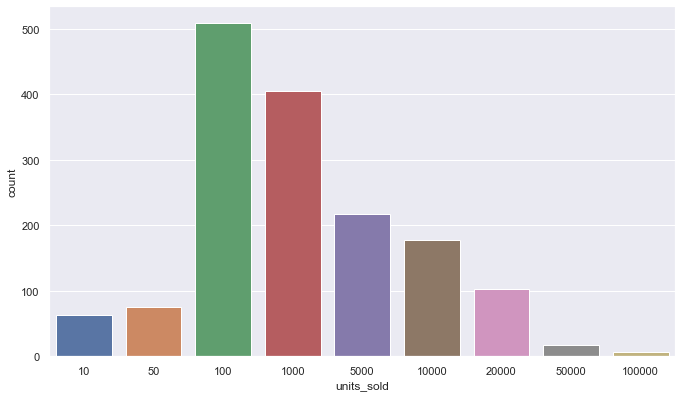

In [28]:
ax = sns.countplot(x="units_sold", data=wish)

# Uses Ad Boosts
Whether the seller paid to boost his product within the platform (highlighting, better placement or whatever).A boolen column with '1' meaning seller used Wish's paid 'Product Boost' service and '0' meaning that they did. Product Boost is the native advertising platform of the Wish Marketplace. Wish statement : " You can run targeted campaigns on your products from Wish, to maximize your conversions and generate higher revenue. As Wish understands its buyers, its native ad system suggests items to customers based on their previous purchases, so the conversion rate is always higher." {int64}

In [29]:
# whether or not the product uses ad product boosts. '1' for yes and '0' for no.
wish['uses_ad_boosts'].value_counts()

0    892
1    681
Name: uses_ad_boosts, dtype: int64

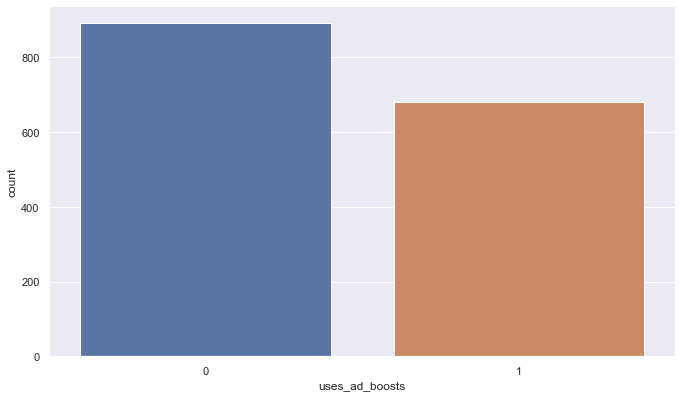

In [30]:
# Lets visualize the records relating to ad boosts.
ax = sns.countplot(x="uses_ad_boosts", data=wish)

# Rating
Mean product rating. {float64}

In [108]:
wish['rating'].describe()

count    1573.000000
mean        3.820896
std         0.515374
min         1.000000
25%         3.550000
50%         3.850000
75%         4.110000
max         5.000000
Name: rating, dtype: float64

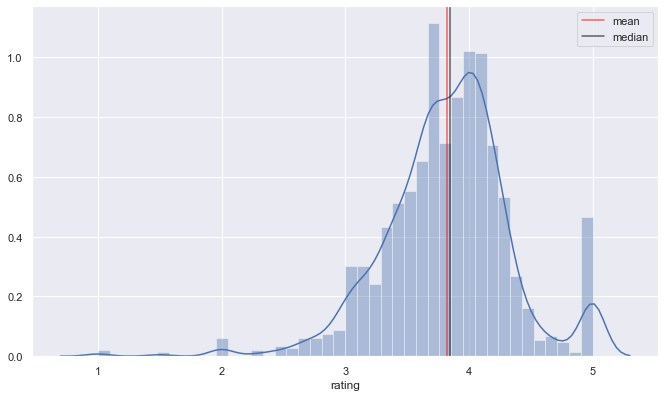

In [32]:
sns.set(rc={'figure.figsize': (10, 6)})

mean=wish['rating'].mean()
median=wish['rating'].median()

sns.distplot(wish.rating)
plt.axvline(mean,0, 1, color = 'red', label='mean',alpha = 0.6)
plt.axvline(median,0, 1, color = 'black', label='median',alpha = 0.6)

plt.legend()

3.85
3.8208963763509174


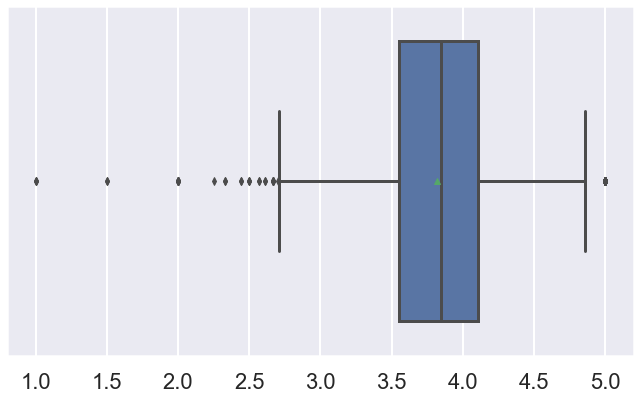

In [33]:
sns.set_context('poster')

x = wish['rating'].values

# 3. add boxplot 
sns.boxplot(x, showmeans = True)

# The line in the middle signifies the median
# Check your median value with python 
print(wish['rating'].median())
# Check your median value with python
print(wish['rating'].mean())

[Text(0.5, 0, '')]

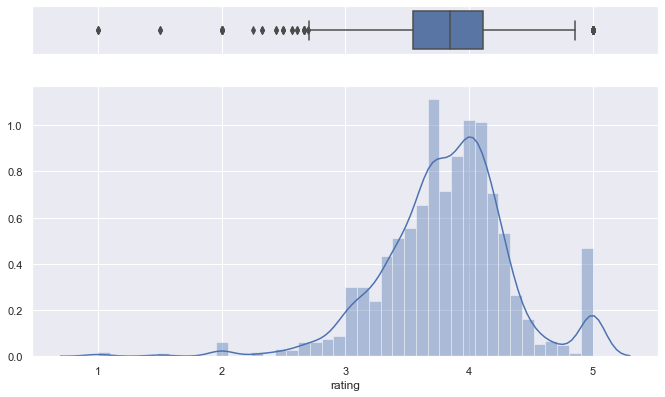

In [34]:
# Cut the window in 2 parts
sns.set(rc={'figure.figsize': (10, 6)})
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(wish["rating"], ax=ax_box)
sns.distplot(wish["rating"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

# Rating Count
Total number of ratings of the product. {int64}

In [35]:
wish['rating_count'].describe()

count     1573.000000
mean       889.659250
std       1983.928834
min          0.000000
25%         24.000000
50%        150.000000
75%        855.000000
max      20744.000000
Name: rating_count, dtype: float64

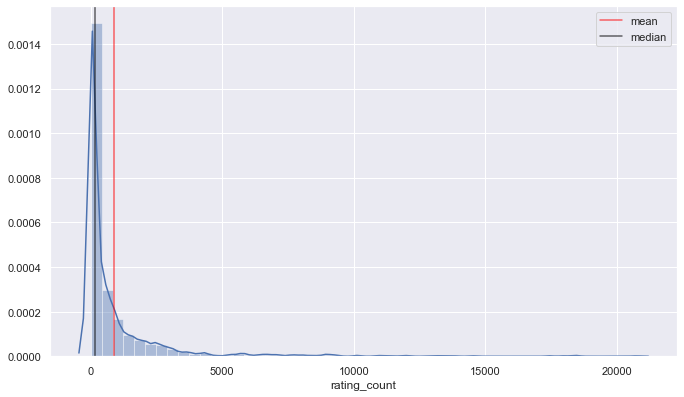

In [36]:
sns.set(rc={'figure.figsize': (10, 6)})

mean=wish['rating_count'].mean()
median=wish['rating_count'].median()

sns.distplot(wish.rating_count)
plt.axvline(mean,0, 1, color = 'red', label='mean',alpha = 0.6)
plt.axvline(median,0, 1, color = 'black', label='median',alpha = 0.6)

plt.legend()

150.0
889.659249841068


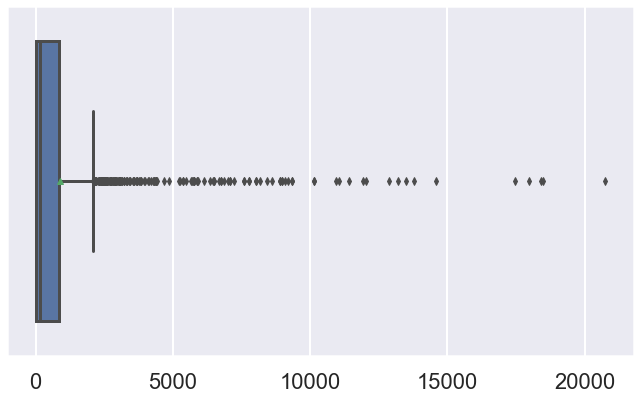

In [37]:
sns.set_context('poster')

x = wish['rating_count'].values

# 3. add boxplot 
sns.boxplot(x, showmeans = True)

# The line in the middle signifies the median
# Check your median value with python 
print(wish['rating_count'].median())
# Check your median value with python
print(wish['rating_count'].mean())

[Text(0.5, 0, '')]

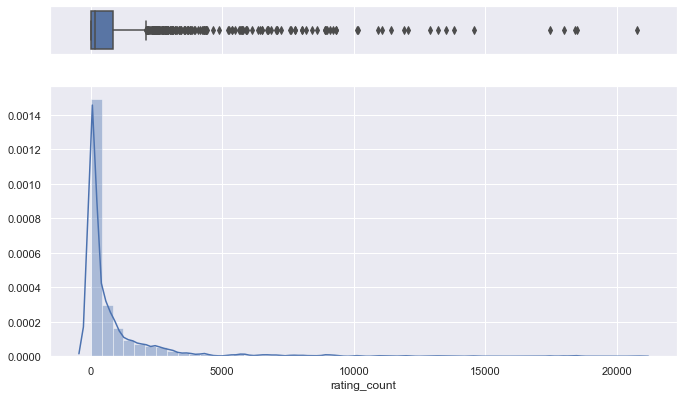

In [38]:
# Cut the window in 2 parts
sns.set(rc={'figure.figsize': (10, 6)})

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(wish["rating_count"], ax=ax_box)
sns.distplot(wish["rating_count"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

# Rating Five Count
The total amount of five star ratings the product recived. {float64}

In [39]:
wish['rating_five_count'].describe()

count     1528.000000
mean       442.263743
std        980.203270
min          0.000000
25%         12.000000
50%         79.000000
75%        413.500000
max      11548.000000
Name: rating_five_count, dtype: float64

In [40]:
wish['rating_five_count'] = wish['rating_five_count'].replace(np.nan, 0)

In [41]:
wish['rating_five_count'].describe()

count     1573.000000
mean       429.611570
std        968.882684
min          0.000000
25%         10.000000
50%         72.000000
75%        394.000000
max      11548.000000
Name: rating_five_count, dtype: float64

# Rating Four Count
The total amount of four star ratings the product recived. {float64}

In [42]:
wish['rating_four_count'].describe()

count    1528.000000
mean      179.599476
std       400.516231
min         0.000000
25%         5.000000
50%        31.500000
75%       168.250000
max      4152.000000
Name: rating_four_count, dtype: float64

In [43]:
wish['rating_four_count'] = wish['rating_four_count'].replace(np.nan, 0)

In [44]:
wish['rating_four_count'].describe()

count    1573.000000
mean      174.461538
std       395.876511
min         0.000000
25%         4.000000
50%        29.000000
75%       163.000000
max      4152.000000
Name: rating_four_count, dtype: float64

# Rating Three Count
The total amount of three star ratings the product recived. {float64}

In [45]:
wish['rating_three_count'].describe()

count    1528.000000
mean      134.549738
std       311.690656
min         0.000000
25%         4.000000
50%        24.000000
75%       129.250000
max      3658.000000
Name: rating_three_count, dtype: float64

In [46]:
wish['rating_three_count'] = wish['rating_three_count'].replace(np.nan, 0)

In [47]:
wish['rating_three_count'].describe()

count    1573.000000
mean      130.700572
std       308.015310
min         0.000000
25%         3.000000
50%        22.000000
75%       121.000000
max      3658.000000
Name: rating_three_count, dtype: float64

# Rating Two Count
The total amount of two star ratings the product recived. {float64}

In [48]:
wish['rating_two_count'].describe()

count    1528.000000
mean       63.711387
std       151.343933
min         0.000000
25%         2.000000
50%        11.000000
75%        62.000000
max      2003.000000
Name: rating_two_count, dtype: float64

In [49]:
wish['rating_two_count'] = wish['rating_two_count'].replace(np.nan, 0)

In [50]:
wish['rating_two_count'].describe()

count    1573.000000
mean       61.888748
std       149.539900
min         0.000000
25%         1.000000
50%        10.000000
75%        59.000000
max      2003.000000
Name: rating_two_count, dtype: float64

# Rating One Count
The total amount of one star ratings the product recived. {float64}

In [51]:
wish['rating_one_count'].describe()

count    1528.000000
mean       95.735602
std       214.075544
min         0.000000
25%         4.000000
50%        20.000000
75%        94.000000
max      2789.000000
Name: rating_one_count, dtype: float64

In [52]:
wish['rating_one_count'] = wish['rating_one_count'].replace(np.nan, 0)

In [53]:
wish['rating_one_count'].describe()

count    1573.000000
mean       92.996821
std       211.592341
min         0.000000
25%         3.000000
50%        18.000000
75%        90.000000
max      2789.000000
Name: rating_one_count, dtype: float64

# Badges Count
Number of badges the product or the seller have. {int64}

In [54]:
wish['badges_count'].describe()

count    1573.000000
mean        0.105531
std         0.340709
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: badges_count, dtype: float64

In [55]:
wish['badges_count'].value_counts()

0    1422
1     138
2      11
3       2
Name: badges_count, dtype: int64

# Badge Local Product
A badge that denotes the product is a local product. Conditions may vary (being produced locally, or something else).

In [56]:
wish['badge_local_product'].value_counts()

0    1544
1      29
Name: badge_local_product, dtype: int64

# Badge Product Quality
Badge awarded when many buyers consistently gave good evaluations. 1 means the merchant has the badge.

In [57]:
wish['badge_product_quality'].value_counts()

0    1456
1     117
Name: badge_product_quality, dtype: int64

# Badge Fast Shipping
Badge awarded when this product's order is consistently shipped rapidly

In [58]:
wish['badge_fast_shipping'].value_counts()

0    1553
1      20
Name: badge_fast_shipping, dtype: int64

# Tags
tags set by the seller.

In [59]:
wish['tags'].head(10)

0    Summer,Fashion,womenunderwearsuit,printedpajam...
1    Mini,womens dresses,Summer,Patchwork,fashion d...
2    Summer,cardigan,women beachwear,chiffon,Sexy w...
3    Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...
4    Summer,Plus Size,Lace,Casual pants,Bottom,pant...
5    Deep V-Neck,Summer,Plus Size,Spaghetti Strap,O...
6    blouse,Women,lace t shirt,summer t-shirts,Lace...
7    Jeans,Fashion,tunic,Shirt,Summer,Dress,Denim,s...
8    slim dress,summer dress,womenshortsleevedre,Sl...
9    blouse,Summer,Plus Size,Floral print,Necks,Sle...
Name: tags, dtype: object

# Product Color
The product's main color.

In [60]:
wish['product_color'].value_counts()

black                  302
white                  254
yellow                 105
pink                    99
blue                    99
red                     93
green                   90
grey                    71
purple                  53
armygreen               31
navyblue                28
winered                 28
orange                  27
multicolor              20
beige                   14
khaki                   12
lightblue               12
gray                    11
white & green           10
rosered                  8
skyblue                  8
coffee                   7
brown                    7
darkblue                 6
rose                     5
floral                   5
lightpink                4
navy                     4
fluorescentgreen         4
leopard                  4
black & green            4
black & white            3
lightgreen               3
camouflage               3
White                    3
orange-red               3
Black                    3
A

# Product Variation Size Id
One of the available size variation for this product.

In [61]:
wish['product_variation_size_id'].value_counts()

S                               641
XS                              356
M                               200
XXS                             100
L                                49
S.                               18
XL                               17
XXL                              15
XXXS                              6
4XL                               5
s                                 5
Size S                            5
XS.                               5
M.                                4
Size-XS                           4
SIZE XS                           4
2XL                               4
33                                3
34                                3
10 ml                             3
Size-S                            3
SizeL                             3
2pcs                              3
35                                2
5XL                               2
Size S.                           2
XXXXL                             2
S Pink                      

# Product Variation Inventory
Inventory the seller has. Max allowed quantity is 50

In [62]:
wish['product_variation_inventory'].value_counts()

50    907
1     152
2      81
5      74
3      52
10     40
4      25
9      22
7      18
6      18
20     16
15     13
17     11
18     10
49      9
13      8
19      7
29      7
25      7
44      6
8       6
11      6
46      6
30      6
12      5
14      5
47      4
34      4
35      4
36      4
41      4
43      4
48      4
27      3
45      3
23      2
21      2
26      2
28      2
31      2
37      2
38      2
39      2
40      2
16      1
22      1
33      1
24      1
Name: product_variation_inventory, dtype: int64

# Shipping Option Name
french shipping quality option

In [63]:
wish['shipping_option_name'].value_counts()

Livraison standard         1508
Standard Shipping            21
Envio Padrão                  9
Expediere Standard            6
Envío normal                  5
الشحن القياسي                 4
Стандартная доставка          3
Standardowa wysyłka           3
Standardversand               3
Livraison Express             3
Standart Gönderi              2
Spedizione standard           2
การส่งสินค้ามาตรฐาน           2
Ekspresowa wysyłka            1
ការដឹកជញ្ជូនតាមស្តង់ដារ       1
Name: shipping_option_name, dtype: int64

# Shipping Option Price
shipping price

In [64]:
wish['shipping_option_price'].value_counts()

2     619
3     520
1     308
4      76
5      32
6      12
7       5
12      1
Name: shipping_option_price, dtype: int64

# Shipping Is Express
whether the shipping is express or not. 1 for True.

In [65]:
wish['shipping_is_express'].value_counts()

0    1569
1       4
Name: shipping_is_express, dtype: int64

# Countries Shipped To
Number of countries this product is shipped to. Sellers may choose to limit where they ship a product to.

In [66]:
wish['countries_shipped_to'].value_counts()

41     171
43     170
40     106
38      76
36      64
35      61
42      57
39      43
25      39
37      38
33      35
45      34
23      34
20      34
31      34
27      31
26      31
48      29
24      25
32      25
44      25
34      23
30      21
18      19
28      18
21      18
14      17
47      17
49      15
22      14
139     14
54      14
29      14
46      12
17      12
55      11
52      10
50       9
138      9
51       8
63       7
10       7
19       7
8        6
58       6
81       5
127      5
80       5
15       4
57       4
109      4
9        4
13       4
60       4
137      3
140      3
118      3
61       3
94       3
16       3
90       3
11       2
12       2
53       2
79       2
62       2
135      2
132      2
78       2
74       2
70       2
104      1
91       1
93       1
107      1
105      1
83       1
111      1
124      1
125      1
84       1
56       1
82       1
59       1
73       1
72       1
71       1
69       1
68       1
67       1
66       1

# Inventory Total
Total inventory for all the product's variations (size/color variations for instance)

In [67]:
wish['inventory_total'].value_counts()

50    1563
2        2
40       1
38       1
37       1
36       1
30       1
24       1
9        1
1        1
Name: inventory_total, dtype: int64

# Has Urgency Banner
whether there was an urgency banner on the product.

In [68]:
wish['has_urgency_banner'].value_counts()

1.0    473
Name: has_urgency_banner, dtype: int64

In [69]:
wish['has_urgency_banner'] = wish['has_urgency_banner'].replace(np.nan, 0)
wish['has_urgency_banner'].value_counts()

0.0    1100
1.0     473
Name: has_urgency_banner, dtype: int64

# Urgency Text
A text banner that appear over some products in the search results.

In [70]:
wish['urgency_text'].value_counts()

Quantité limitée !                  472
Réduction sur les achats en gros      1
Name: urgency_text, dtype: int64

# Origin Country
country where the products are coming from.

In [71]:
wish['origin_country'].value_counts()

CN    1516
US      31
VE       5
SG       2
GB       1
AT       1
Name: origin_country, dtype: int64

In [72]:
def change_country(item):
    if item == 'VE':
        return 'Other'
    elif item == 'SG':
        return 'Other'
    elif item == 'AT':
        return 'Other'
    elif item == 'GB':
        return 'Other'
    else:
        return item

In [73]:
wish['origin_country'] = wish['origin_country'].apply(change_country)

In [74]:
wish['origin_country'].value_counts()

CN       1516
US         31
Other       9
Name: origin_country, dtype: int64

# Merchant Title
Merchant's displayed name (show in the UI as the seller's shop name).

In [75]:
wish['merchant_title'].head(10)

0                  zgrdejia
1                 SaraHouse
2                    hxt520
3                  allenfan
4           youngpeopleshop
5             zhoulinglinga
6    Unique Li Fashion Shop
7                   So Band
8           chenxiangjunjun
9             Luowei clothe
Name: merchant_title, dtype: object

# Merchant Name
Merchant's canonical name. A name not shown publicly. Used by the website under the hood as a canonical name.

In [76]:
wish['merchant_name'].head(10)

0                                             zgrdejia
1                                            sarahouse
2                                               hxt520
3                                             allenfan
4                                          happyhorses
5                                        zhoulinglinga
6    uniquelifashionshopbb657bfe91d211e598c7063a14d...
7                                               soband
8                                      chenxiangjunjun
9                                         luoweiclothe
Name: merchant_name, dtype: object

In [77]:
del wish['merchant_name']

In [78]:
wish.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'rating_five_count',
       'rating_four_count', 'rating_three_count', 'rating_two_count',
       'rating_one_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_name', 'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'has_urgency_banner',
       'urgency_text', 'origin_country', 'merchant_title',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

# Merchant Info Subtitle
The subtitle text as shown on a seller's info section to the user. (raw, not preprocessed). The website shows this to the user.

In [79]:
wish['merchant_info_subtitle'].head(10)

0                          (568 notes)
1    83 % avis positifs (17,752 notes)
2       86 % avis positifs (295 notes)
3                       (23,832 notes)
4    85 % avis positifs (14,482 notes)
5        75 % avis positifs (65 notes)
6    86 % avis positifs (10,194 notes)
7                          (342 notes)
8       82 % avis positifs (330 notes)
9     85 % avis positifs (5,534 notes)
Name: merchant_info_subtitle, dtype: object

In [80]:
def positive_per(words):
    pos_ses = 'avis positifs'
    if f'{pos_ses}' in f'{words}':
        return 1
    else:
        return 0
    
wish['subtitle_rating'] = wish['merchant_info_subtitle'].apply(positive_per)

In [81]:
wish['subtitle_rating'].head(10)

0    0
1    1
2    1
3    0
4    1
5    1
6    1
7    0
8    1
9    1
Name: subtitle_rating, dtype: int64

# Merchant Rating Count
Number of ratings of this seller

In [82]:
wish['merchant_rating_count'].describe()

count    1.573000e+03
mean     2.649583e+04
std      7.847446e+04
min      0.000000e+00
25%      1.987000e+03
50%      7.936000e+03
75%      2.456400e+04
max      2.174765e+06
Name: merchant_rating_count, dtype: float64

# Merchant Rating
merchant's rating

In [83]:
wish['merchant_rating'].describe()

count    1573.000000
mean        4.032345
std         0.204768
min         2.333333
25%         3.917353
50%         4.040650
75%         4.161797
max         5.000000
Name: merchant_rating, dtype: float64

In [84]:
# Need to graph

# Merchant Has Profile Picture
Convenience boolean that says whether there is a `merchant_profile_picture` url

In [85]:
wish['merchant_has_profile_picture'].value_counts()

0    1347
1     226
Name: merchant_has_profile_picture, dtype: int64

# Product Url
url to the product page. You may need to login to access it

In [86]:
wish['product_url'].head()

0    https://www.wish.com/c/5e9ae51d43d6a96e303acdb0
1    https://www.wish.com/c/58940d436a0d3d5da4e95a38
2    https://www.wish.com/c/5ea10e2c617580260d55310a
3    https://www.wish.com/c/5cedf17ad1d44c52c59e4aca
4    https://www.wish.com/c/5ebf5819ebac372b070b0e70
Name: product_url, dtype: object

In [87]:
del wish['product_url']

In [88]:
wish.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'rating_five_count',
       'rating_four_count', 'rating_three_count', 'rating_two_count',
       'rating_one_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_name', 'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'has_urgency_banner',
       'urgency_text', 'origin_country', 'merchant_title',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_picture', 'product_id', 'theme',
       'crawl_month', 'subtitle_rating'],
      dtype='object')

# Product Picture
actual picture of the product

In [89]:
wish['product_picture'].head()

0    https://contestimg.wish.com/api/webimage/5e9ae...
1    https://contestimg.wish.com/api/webimage/58940...
2    https://contestimg.wish.com/api/webimage/5ea10...
3    https://contestimg.wish.com/api/webimage/5cedf...
4    https://contestimg.wish.com/api/webimage/5ebf5...
Name: product_picture, dtype: object

# Product Id
product identifier. You can use this key to remove duplicate entries if you're not interested in studying them.

In [90]:
wish['product_id'].head()

0    5e9ae51d43d6a96e303acdb0
1    58940d436a0d3d5da4e95a38
2    5ea10e2c617580260d55310a
3    5cedf17ad1d44c52c59e4aca
4    5ebf5819ebac372b070b0e70
Name: product_id, dtype: object

# Theme
the search term used in the search bar of the website to get these search results.

In [91]:
wish['theme'].value_counts()

summer    1573
Name: theme, dtype: int64

In [92]:
del wish['theme']

In [93]:
wish.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'rating_five_count',
       'rating_four_count', 'rating_three_count', 'rating_two_count',
       'rating_one_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_name', 'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'has_urgency_banner',
       'urgency_text', 'origin_country', 'merchant_title',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_picture', 'product_id',
       'crawl_month', 'subtitle_rating'],
      dtype='object')

# Crawl Month
meta: for info only

In [94]:
wish['crawl_month'].value_counts()

2020-08    1573
Name: crawl_month, dtype: int64

In [95]:
del wish['crawl_month']

In [96]:
wish.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'rating_five_count',
       'rating_four_count', 'rating_three_count', 'rating_two_count',
       'rating_one_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_name', 'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'has_urgency_banner',
       'urgency_text', 'origin_country', 'merchant_title',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_picture', 'product_id',
       'subtitle_rating'],
      dtype='object')

# Creating New Columns 

In [ ]:
I am making a new column that has the count of the individual tags 

In [97]:
# Check the number of tags for each product
def tag_count(tags):
    tag_str = tags
    prod_tags = tag_str.split(',')
    return len(prod_tags)
    
wish['tag_count'] = wish['tags'].apply(tag_count)

In [98]:
wish['tag_count'].head()

0    24
1    15
2    19
3    18
4    13
Name: tag_count, dtype: int64

Creating a new column which will tell me if the title and title_orig are the same.

In [99]:
def is_trans(trans,origi):
    if trans == origi:
        return 0
    else:
        return 1
    
wish['title_translated'] = wish.apply(lambda x: is_trans(x.title, x.title_orig), axis=1 ) 

In [100]:
wish['title_translated'].head()

0    0
1    1
2    1
3    1
4    1
Name: title_translated, dtype: int64

Created a new column to have a percentage of how many 5,4,3,2,1 star ratings 

In [101]:
def rating_percent(s_count,t_count):
    if s_count == 0:
        return 0
    else:
        return s_count/t_count * 100
    
wish['rating_five_percent'] = wish.apply(lambda x: rating_percent(x.rating_five_count, x.rating_count), axis = 1)
wish['rating_four_percent'] = wish.apply(lambda x: rating_percent(x.rating_four_count, x.rating_count), axis = 1)
wish['rating_three_percent'] = wish.apply(lambda x: rating_percent(x.rating_three_count, x.rating_count), axis = 1)
wish['rating_two_percent'] = wish.apply(lambda x: rating_percent(x.rating_two_count, x.rating_count), axis = 1)
wish['rating_one_percent'] = wish.apply(lambda x: rating_percent(x.rating_one_count, x.rating_count), axis = 1)

In [102]:
wish.head(10)

,title,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_picture,product_id,subtitle_rating,tag_count,title_translated,rating_five_percent,rating_four_percent,rating_three_percent,rating_two_percent,rating_one_percent
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,0,24,0,48.148148,14.814815,18.518519,1.851852,16.666667
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,1,15,1,36.984515,16.740016,18.223309,10.497148,17.555012
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,1,19,1,35.714286,28.571429,14.285714,0.000000,21.428571
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,0.0,NaN,CN,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,0,18,1,50.949914,20.552677,15.025907,7.253886,6.217617
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,1,13,1,30.000000,20.000000,10.000000,10.000000,30.000000
5,Plus la taille d'été femmes décontracté sans m...,Plus Size Summer Women Casual Sleeveless Rompe...,3.92,9,10,0,5.00,1,1.0,0.0,0.0,0.0,0.0,0,0,0,0,"Deep V-Neck,Summer,Plus Size,Spaghetti Strap,O...",navyblue,Size-XS,1,Livraison standard,1,0,40,50,0.0,NaN,CN,zhoulinglinga,75 % avis positifs (65 notes),65,3.507692,5e4b9c3801ba9d210036fc5a,0,NaN,https://contestimg.wish.com/api/webimage/5ec64...,5ec645bafd107a02279c8c54,1,10,1,100.000000,0.000000,0.000000,0.000000,0.000000
6,Women Fashion Loose Lace Blouse Blouse V Neck ...,Women Fashion Loose Lace Blouse V Neck Bat Sle...,7.00,6,50000,0,3.84,6742,3172.0,1352.0,971.0,490.0,757.0,0,0,0,0,"blouse,Women,lace t shirt,summer t-shirts,Lace...",white,XS,50,Livraison standard,2,0,31,50,0.0,NaN,CN,Unique Li Fashion Shop,"86 % avis positifs

Created a new column which shows me the discount rate between retail price and the customer price

In [103]:
def dis_per(r_price,buyer_price):
    return (r_price - buyer_price) / r_price
    
wish['discount_rate'] = wish.apply(lambda x: dis_per(x.retail_price, x.price),axis = 1)

In [105]:
wish['discount_rate'].head(5)

0   -0.142857
1    0.636364
2    0.813953
3    0.000000
4    0.093333
Name: discount_rate, dtype: float64